In [12]:
import joblib
model = joblib.load("fake_news_pred_model.pkl")
vectorizer = joblib.load("fake_news_vectorizer_model.pkl")

In [13]:
import pandas as pd

df = pd.read_csv("fake_news_dataset.csv")

df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [14]:
x = vectorizer.transform(df['text'])

print("TI-IDF Vector shape: ", x.shape)

print(x)

TI-IDF Vector shape:  (4000, 20000)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44000 stored elements and shape (4000, 20000)>
  Coords	Values
  (0, 690)	0.3130271312231664
  (0, 708)	0.07614075019066972
  (0, 1074)	0.2542852486344424
  (0, 3723)	0.5491162516397512
  (0, 3733)	0.3264282821305119
  (0, 4741)	0.3912583684585379
  (0, 9275)	0.4924364765352266
  (0, 9316)	0.08552441589944539
  (0, 12350)	0.07551895735072427
  (0, 17660)	0.07328981224154849
  (0, 17730)	0.09749770711150034
  (1, 690)	0.3130271312231664
  (1, 708)	0.07614075019066972
  (1, 1074)	0.2542852486344424
  (1, 3723)	0.5491162516397512
  (1, 3733)	0.3264282821305119
  (1, 4741)	0.3912583684585379
  (1, 9275)	0.4924364765352266
  (1, 9316)	0.08552441589944539
  (1, 12350)	0.07551895735072427
  (1, 17660)	0.07328981224154849
  (1, 17730)	0.09749770711150034
  (2, 690)	0.3130271312231664
  (2, 708)	0.07614075019066972
  (2, 1074)	0.2542852486344424
  :	:
  (3997, 12350)	0.07551895735072427
  (3997, 17

In [20]:
from sklearn.metrics import accuracy_score, classification_report

label_map = {"Fake":0, "Real":1}

y_true = df['label'].map(label_map)

x = vectorizer.transform(df['text'])
pred = model.predict(x)

print("Accuracy: ", accuracy_score(y_true, pred))
print("\nClassification Report:\n ", classification_report(y_true, pred))

Accuracy:  0.4935

Classification Report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2026
           1       0.49      1.00      0.66      1974

    accuracy                           0.49      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.24      0.49      0.33      4000



D:\PythonP\cuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\PythonP\cuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\PythonP\cuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44000 stored elements and shape (4000, 20000)>
  Coords	Values
  (0, 690)	0.3130271312231664
  (0, 708)	0.07614075019066972
  (0, 1074)	0.2542852486344424
  (0, 3723)	0.5491162516397512
  (0, 3733)	0.3264282821305119
  (0, 4741)	0.3912583684585379
  (0, 9275)	0.4924364765352266
  (0, 9316)	0.08552441589944539
  (0, 12350)	0.07551895735072427
  (0, 17660)	0.07328981224154849
  (0, 17730)	0.09749770711150034
  (1, 690)	0.3130271312231664
  (1, 708)	0.07614075019066972
  (1, 1074)	0.2542852486344424
  (1, 3723)	0.5491162516397512
  (1, 3733)	0.3264282821305119
  (1, 4741)	0.3912583684585379
  (1, 9275)	0.4924364765352266
  (1, 9316)	0.08552441589944539
  (1, 12350)	0.07551895735072427
  (1, 17660)	0.07328981224154849
  (1, 17730)	0.09749770711150034
  (2, 690)	0.3130271312231664
  (2, 708)	0.07614075019066972
  (2, 1074)	0.2542852486344424
  :	:
  (3997, 12350)	0.07551895735072427
  (3997, 17660)	0.07328981224154849
  (3997, 17

In [3]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load saved model + vectorizer
model = joblib.load("fake_news_pred_model.pkl")
vectorizer = joblib.load("fake_news_vectorizer_model.pkl")

# Load new dataset
df = pd.read_csv("fake_and_real_news.csv")
df = df[['text', 'label']]

# If labels are text ("Fake"/"Real"), convert them to numbers
df['label'] = df['label'].replace({'Fake': 1, 'Real': 0})
# df['label'] = df['label'].map(label_map)

# Transform with the OLD vectorizer

df['label'] = df['label'].astype(int)
x = vectorizer.transform(df['text'])
y_true = df['label']

# Predict
pred = model.predict(x)

# Evaluate
print("Accuracy: ", accuracy_score(y_true, pred))
print("\nClassification Report:\n", classification_report(y_true, pred))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5676\1403332613.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'Fake': 1, 'Real': 0})


Accuracy:  0.9456565656565656

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      4900
           1       0.91      0.99      0.95      5000

    accuracy                           0.95      9900
   macro avg       0.95      0.95      0.95      9900
weighted avg       0.95      0.95      0.95      9900



In [38]:
df.tail()

,Text,label
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,1
9896,Trump consults Republican senators on Fed chie...,0
9897,Trump lawyers say judge lacks jurisdiction for...,0
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,1
9899,Sean Spicer HILARIOUSLY Branded As Chickensh*...,1


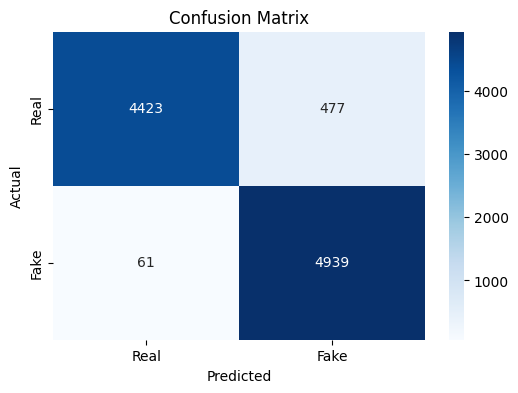

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_true, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
